# Linear Regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
sns.set_theme(font_scale=2,palette='colorblind')

## Setting upa linear regression

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


We're going to predict **tip** from **total bill** using 80% of the data for training.
This is a regression problem because the target, *tip* is a continuous value,
the problems we've seen so far were all classification, species of iris and the
character in that corners data were both categorical.  

Using linear regression is also a good choice because it makes sense that the tip
would be approximately linearly related to the total bill, most people pick some
percentage of the total bill.  If we our prior knowledge was that people
typically tipped with some more complicated function, this would not be a good
model.

In [4]:
# sklearn requires 2D object of features even for 1 feature
tips_X = tips['total_bill'].values
tips_X = tips_X[:,np.newaxis] # add an axis
tips_y = tips['tip']

tips_X_train,tips_X_test, tips_y_train, tips_y_test = train_test_split(
                                          tips_X,
                                          tips_y,
                                          train_size=.8,
                                          random_state=0)

To see what that new bit of code did, we can examine the shapes:

In [5]:
tips_X.shape

(244, 1)

what we ended up  is 2 dimensions (there are two numbers) even though the second
one is 1.

In [6]:
tips['total_bill'].values.shape

(244,)

this, without the `newaxis` is one dimension, we can see that because there is
no number after the comma.  

Now that our data is ready, we create the linear regression estimator object

In [7]:
regr = linear_model.LinearRegression()

Now we fit the model.

In [8]:
regr.fit(tips_X_train,tips_y_train)

LinearRegression()

We can examine the coefficients and intercept.

In [9]:
regr.coef_, regr.intercept_

(array([0.0968534]), 1.0285439454607272)

These define a line (y = mx+b) coef is the slope.


```{important}
This is what our model *predicts* the tip will be based on the past data.  It is
important to note that this is not what the tip *should* be by any sort of
virtues. For example, a typical normative rule for tipping is to tip 15% or 20%.
the model we learned, from this data, however is ~%10 + $1. (it's actually
9.68% + $1.028)
```

To interpret this, we can apply it for a single value. We trained this to
predict the tip from the total bill.  So, we can put in any value that's a
plausible total bill and get the predicted tip.

In [10]:
my_bill = np.asarray([17.78]).reshape(1,-1)
regr.predict(my_bill)

array([2.75059744])

We can also apply the function, as usual.

In [11]:
tips_y_pred = regr.predict(tips_X_test)

This gives a vector of values.

In [12]:
tips_y_pred

array([2.7321953 , 2.79999268, 2.91621676, 1.73073111, 2.60434881,
       1.58545101, 2.76415692, 3.28813383, 2.7864332 , 4.38451435,
       3.47699796, 3.47021823, 2.39127132, 2.28763818, 2.32831661,
       3.97288739, 1.83726986, 2.38449158, 2.84745085, 3.26585755,
       3.93995723, 3.05471713, 2.57819839, 2.48521912, 2.33703342,
       2.61693975, 2.20628132, 3.91477534, 3.4779665 , 2.55592211,
       2.45519457, 2.23727441, 2.52202341, 2.05422148, 2.79999268,
       2.32541101, 2.66827205, 2.02903959, 5.7094689 , 2.57626132,
       1.85954614, 2.23243174, 2.54817383, 3.91961801, 2.26439336,
       2.67214619, 2.79515001, 3.11864037, 2.68183153])

To visualize in more detail, we'll plot the data as black points and the
predictions as blue points.  To highlight that this is a perfectly linear
prediction, we'll also add a line for the prediction.

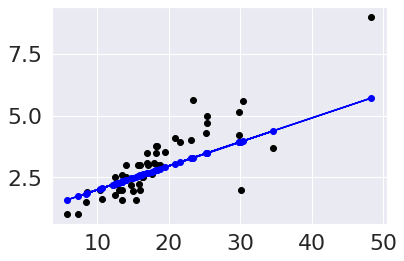

In [13]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.plot(tips_X_test,tips_y_pred, color='blue')
plt.scatter(tips_X_test,tips_y_pred, color='blue')

## Evaluating Regression - Mean Squared Error

From the plot, we can see that there is some error for each point, so accuracy
that we've been using, won't work.  One idea is to look at how much error there
is in each prediction, we can look at that visually first.

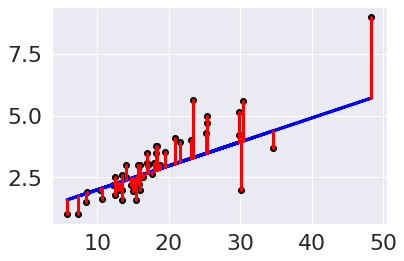

In [14]:
plt.scatter(tips_X_test, tips_y_test, color='black')
plt.plot(tips_X_test, tips_y_pred, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(tips_X_test, tips_y_pred,tips_y_test)];

We can use the average length of these red lines to capture the error. To get
the length, we can take the difference between the prediction and the data for
each point. Some would be positive and others negative, so we will square each
one then take the average.

In [15]:
mean_squared_error(tips_y_test, tips_y_pred)

0.821309064276629

We can get back to the units being dollars, by taking the square root.

In [16]:
np.sqrt(mean_squared_error(tips_y_test, tips_y_pred))

0.9062610353957787

This is equivalent to using absolute value instead

In [17]:
np.mean(np.abs(tips_y_test - tips_y_pred))

0.6564074900962107

## Evaluating Regression - R2

We can also use the $R^2$ regression coefficient.

In [18]:
r2_score(tips_y_test,tips_y_pred)

0.5906895098589039

This is a bit harder to interpret, but we can use some additional plots to
visualize.
This code simulates data by randomly picking 20 points, spreading them out
and makes the “predicted” y values by picking a slope of 3. Then I simulated various levels of noise, by sampling noise and multiplying the same noise vector by different scales and adding all of those to a data frame with the column name the r score for if that column of target values was the truth.

Then I added some columns of y values that were with different slopes and different functions of x. These all have the small amount of noise.

````{margin}
```{tip}
[Facet Grids](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) allow more customization than the figure level plotting functions
we have used otherwise, but each of those combines a FacetGrid with a
particular type of plot.
```
````

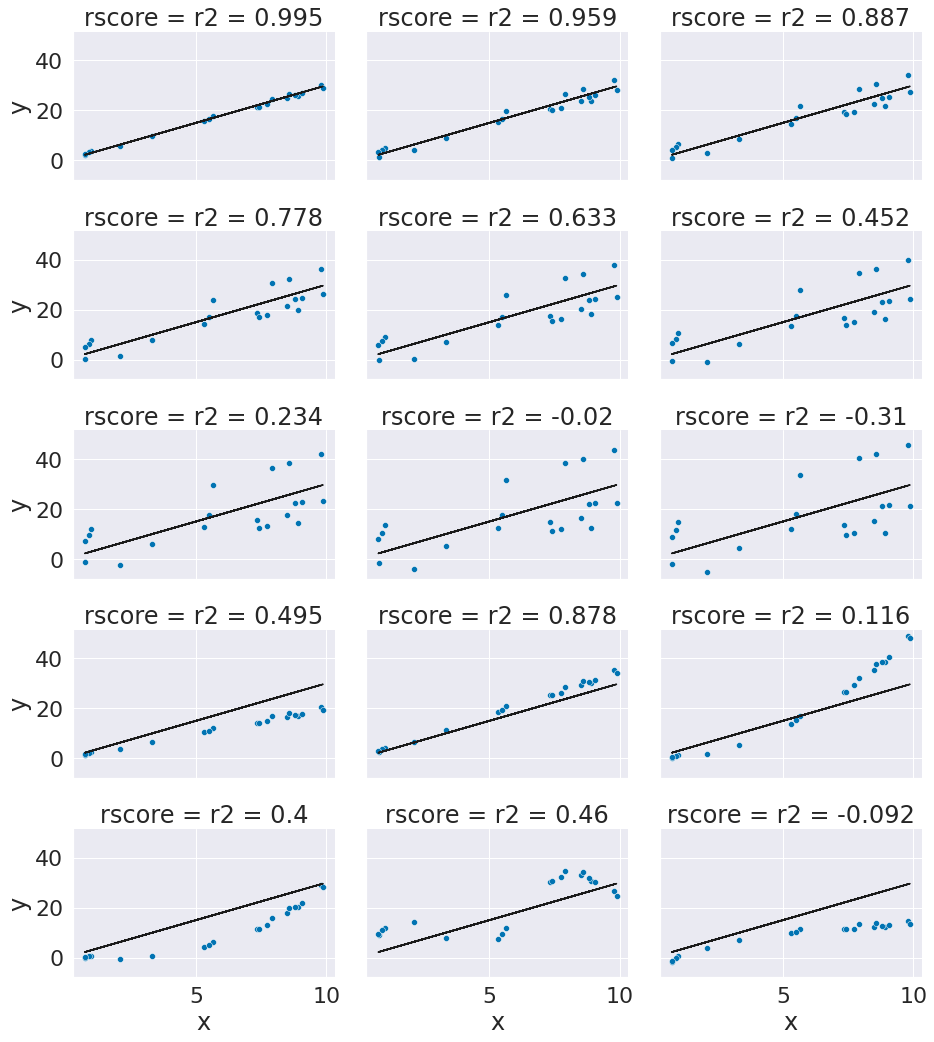

In [19]:
x = 10*np.random.random(20)
y_pred = 3*x
ex_df = pd.DataFrame(data = x,columns = ['x'])
ex_df['y_pred'] = y_pred
n_levels = range(1,18,2)
# sample 0 mean noise
noise = (np.random.random(20)-.5)*2
# add varying noise levels
for n in n_levels:
    # add noise, scaled
    y_true = y_pred + n* noise
    # compute the r2 in the column name, assign the "true" (data) here
    ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true

# add functions
f_x_list = [2*x,3.5*x,.5*x**2, .03*x**3, 10*np.sin(x)+x*3,3*np.log(x**2)]
for fx in f_x_list:
    y_true = fx + noise
    # compute the r2 in the column name, assign the "true" (data) here
    ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true  

# melt the data frame for plotting
xy_df = ex_df.melt(id_vars=['x','y_pred'],var_name='rscore',value_name='y')
# create a FacetGrid so that we can add two types of plots per subplot
g = sns.FacetGrid(data = xy_df,col='rscore',col_wrap=3,aspect=1.5,height=3)
g.map(plt.plot, 'x','y_pred',color='k')
g.map(sns.scatterplot, "x", "y",)

## Multivariate Regression

We can also load data from Scikit learn.

This dataset includes 10 features measured on a given date and an measure of
diabetes disease progression measured one year later. The predictor we can train
with this data might be someting a doctor uses to calculate a patient's risk.

In [20]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

In [21]:
diabetes_X.shape

(442, 10)

In [22]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
        diabetes_X, diabetes_y)
regr_diabetes = linear_model.LinearRegression()

In [23]:
regr_diabetes.fit(diabetes_X_train,diabetes_y_train)

LinearRegression()

## What score does linear regression use?

In [24]:
regr_diabetes.score(diabetes_X_test,diabetes_y_test)

0.5077788853410483

In [25]:
diabetes_y_pred = regr_diabetes.predict(diabetes_X_test)

In [26]:
r2_score(diabetes_y_test,diabetes_y_pred)

0.5077788853410483

In [27]:
mean_squared_error(diabetes_y_test,diabetes_y_pred)

3405.805052442806

It uses the R2 score.  

This model predicts what lab measure a patient will have one year in the future
based on lab measures in a given day.  Since we see that this is not a very high
r2, we can say that this is not a perfect predictor, but a Doctor, who better
understands the score would have to help interpret the core.

## Questions After class

### How I should use these with data most effectively? What is the proper use of these methods?
```{toggle}
To answer continuous prediction tasks, like the ones we saw today. The notes
above include more interpretation than we discussed in class, so read carefully
for that.
```

### Why is that even when random state is set to 0 numbers are still a little different compared to yours and my neighbor even
```{toggle}
[random state](https://scikit-learn.org/stable/glossary.html#term-random_state)
sets the seed that's used internally and should work to
[control the randomness](https://scikit-learn.org/stable/common_pitfalls.html#randomness)
and produce reproducible results.
If your results are just a little different, like that it could be a rounding
error, maybe you somehow set a default for display that's different.

See for example [these options](https://stackoverflow.com/questions/25200609/apply-round-off-setting-to-whole-notebook)
```